In [1]:
import pandas as pd
df=pd.read_csv('d:/data/wine/winequality-red2.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [4]:
df['class'].value_counts() #class 카운트 

1    855
0    744
Name: class, dtype: int64

In [5]:
train_cols=df.columns[0:11]
X=df[train_cols] #독립변수
y=df['class'] #종속변수

In [10]:
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [11]:
df2['class'].value_counts() #언더샘플링 후 카운트

1    744
0    744
Name: class, dtype: int64

In [12]:
X=X_samp[train_cols]
y=y_samp['class']

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#학습용:검증용 8:2로 구분
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=10)

#의사결정나무 모형
model=DecisionTreeClassifier(random_state=0,max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [31]:
print(model.score(X_train,y_train)) #학습용
print(model.score(X_test,y_test)) #검증용

0.7798319327731092
0.7550335570469798


In [32]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test) #예측값
print(pred)#예측값
print(y_test.values) #실제값
cm=confusion_matrix(y_test,pred)
cm

[0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1
 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1
 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0
 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0
 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1
 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0
 1 1]
[0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1
 0 0 1 0 1 1 1 1 0 

array([[106,  41],
       [ 32, 119]], dtype=int64)

In [33]:
df_cm=pd.DataFrame(cm,index=[0,1],columns=[0,1])
df_cm

,0,1
0,106,41
1,32,119


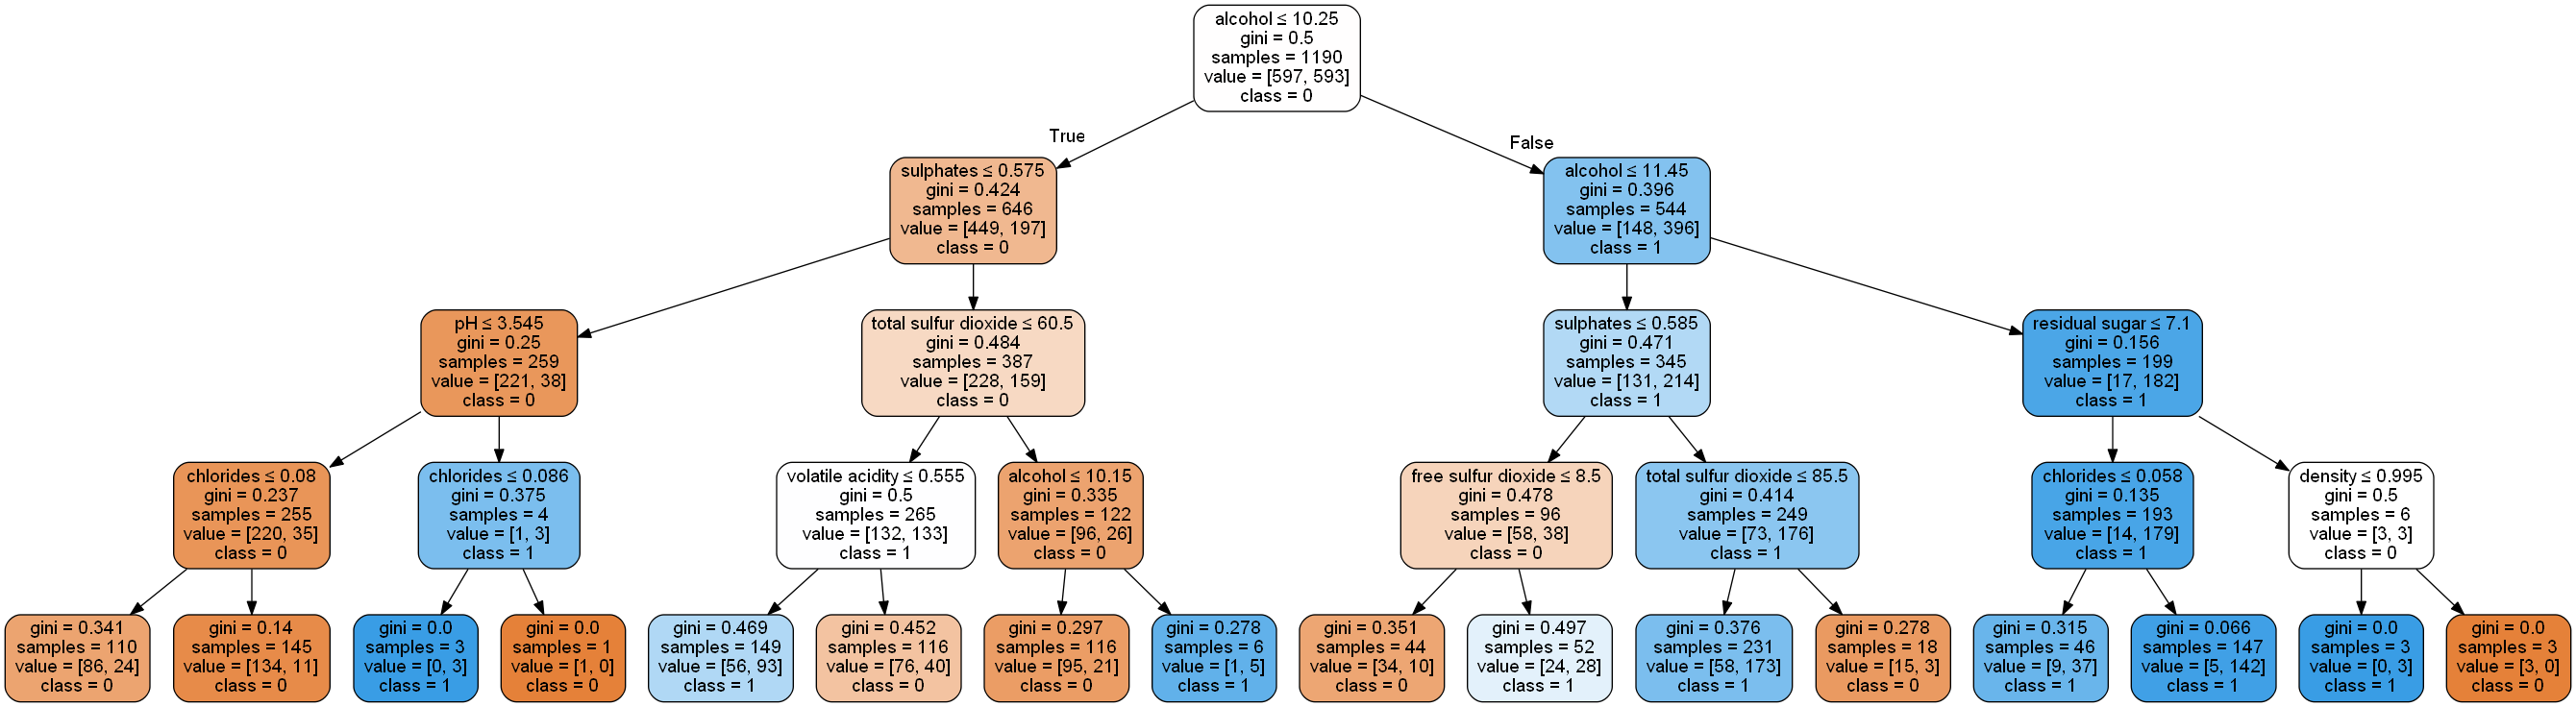

In [34]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data=export_graphviz(model,out_file=None,
                         feature_names=train_cols,class_names=['0','1'],filled=True,
                         rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

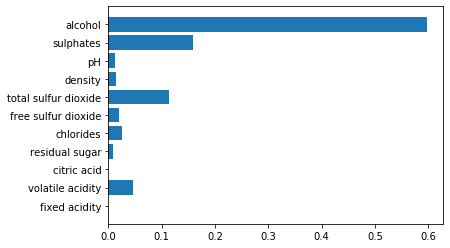

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#특성중요도 그래프
def plot_tree(model):
    n_features=X.shape[1] #독립변수의 갯수
    plt.barh(range(n_features),model.feature_importances_,
             align='center')
    plt.yticks(np.arange(n_features),train_cols)
    plt.ylim(-1,n_features) #y축 값의 범위
    
plot_tree(model)
#중요도: alcohol > sulphates > total sulfur dioxide

In [42]:
#랜덤포레스트 모형
from sklearn.ensemble import RandomForestClassifier
#n_estimators 트리갯수, max_depth 최대질문단계(가지치기)
forest=RandomForestClassifier(n_estimators=100,random_state=10,
                            max_depth=4)
forest.fit(X_train,y_train)
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

0.7823529411764706
0.7785234899328859


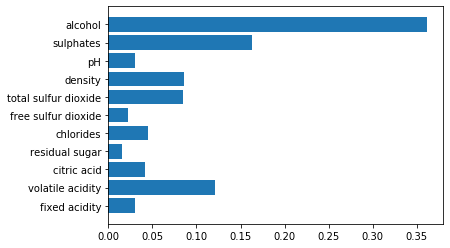

In [43]:
plot_tree(forest) #랜덤포레스트모형의 특성 중요도 그래프
# alchol>sulphates>volatile acidity